In [331]:
# filtering the warnings
import warnings; warnings.filterwarnings('ignore')

#importing required libraries
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt, math

#machine learning libraries
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.feature_selection import RFE
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [333]:
# reading data
df = pd.read_csv('day.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [335]:
# no of rows and col
df.shape

(730, 16)

In [337]:
# size of the dataframe
df.size

11680

In [339]:
# checking the null values
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [341]:
# checking col wise info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


we can see only one col is in object datatype rest are in int or float, we need to check either to change them to categorical values or treat them as int/float

In [344]:
# checking col stats
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [346]:
# checking unique values
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

### Duplicates checking

In [349]:
# creating a copy of original df to check duplicates
df_dup = df.copy()

# checking and dropping entire duplicate row
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(730, 16)

The shape after running the drop duplicates command is same as the original dataframe.

Hence we can conclude that there were zero duplicate values in the dataset

### Data cleaning 

In [353]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

Checking value_counts() for entire dataframe.

This will help to identify any Unknow/Junk values present in the dataset.

In [356]:
for col in df:
    print(df[col].value_counts(ascending=False), '\n')

instant
1      1
480    1
482    1
483    1
484    1
      ..
246    1
247    1
248    1
249    1
730    1
Name: count, Length: 730, dtype: int64 

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 

yr
0    365
1    365
Name: count, dtype: int64 

mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 

holiday
0    709
1     21
Name: count, dtype: int64 

weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64 

workingday
1    499
0    231
Name: count, dtype: int64 

weathersit
1    463
2    246
3     21
Name: count, dtype: int64 

temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
           

There seems no junk/unknown values in the dataset

## Removing redundant and unwanted columns

Based on the high level look in the dataset and data dictionary, the following cols can be removed.
- instant: gives only index
- dteday: since we have separate col for month and years we don't need it
- casual & reg: our motive is to find total, these two are not going to give any contributions.

In [360]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [362]:
df_new=df.drop(columns=['instant','dteday','casual','registered'])
df_new.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

### Creating Dummy Variables
We will create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

Before creating dummy variables, we will have to convert them into 'category' data types.

In [365]:
# checking before conversion
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [367]:
# converting to 'category' dataset

df_new['season'] = df_new['season'].astype('category')
df_new['weathersit'] = df_new['weathersit'].astype('category')
df_new['mnth'] = df_new['mnth'].astype('category')
df_new['weekday'] = df_new['weekday'].astype('category')

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [369]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy was created
# 3) Drop first dummy variable for each set of dummies created.
df_new = pd.get_dummies(df_new, drop_first=True)
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    bool   
 9   season_3      730 non-null    bool   
 10  season_4      730 non-null    bool   
 11  mnth_2        730 non-null    bool   
 12  mnth_3        730 non-null    bool   
 13  mnth_4        730 non-null    bool   
 14  mnth_5        730 non-null    bool   
 15  mnth_6        730 non-null    bool   
 16  mnth_7        730 non-null    bool   
 17  mnth_8        730 non-null    bool   
 18  mnth_9        730 non-null    

In [371]:
df_new.shape

(730, 30)

## Splitting the data
Splitting the data to Train and Test: -

We will now split the data into TRAIN and TEST (70:30 ratio)

We will use train_test_split method from sklearn package for this

In [374]:
from sklearn.model_selection import train_test_split

#specifying 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(df_new, train_size=0.70, test_size = 0.30, random_state=333)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

In [376]:
df_train.shape

(510, 30)

In [378]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    bool   
 9   season_3      219 non-null    bool   
 10  season_4      219 non-null    bool   
 11  mnth_2        219 non-null    bool   
 12  mnth_3        219 non-null    bool   
 13  mnth_4        219 non-null    bool   
 14  mnth_5        219 non-null    bool   
 15  mnth_6        219 non-null    bool   
 16  mnth_7        219 non-null    bool   
 17  mnth_8        219 non-null    bool   
 18  mnth_9        219 non-null    bool

In [379]:
df_test.shape

(219, 30)

## EXPLORATORY DATA ANALYSIS
We need to perform the EDA on TRAINING (df_train) Dataset.

In [383]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

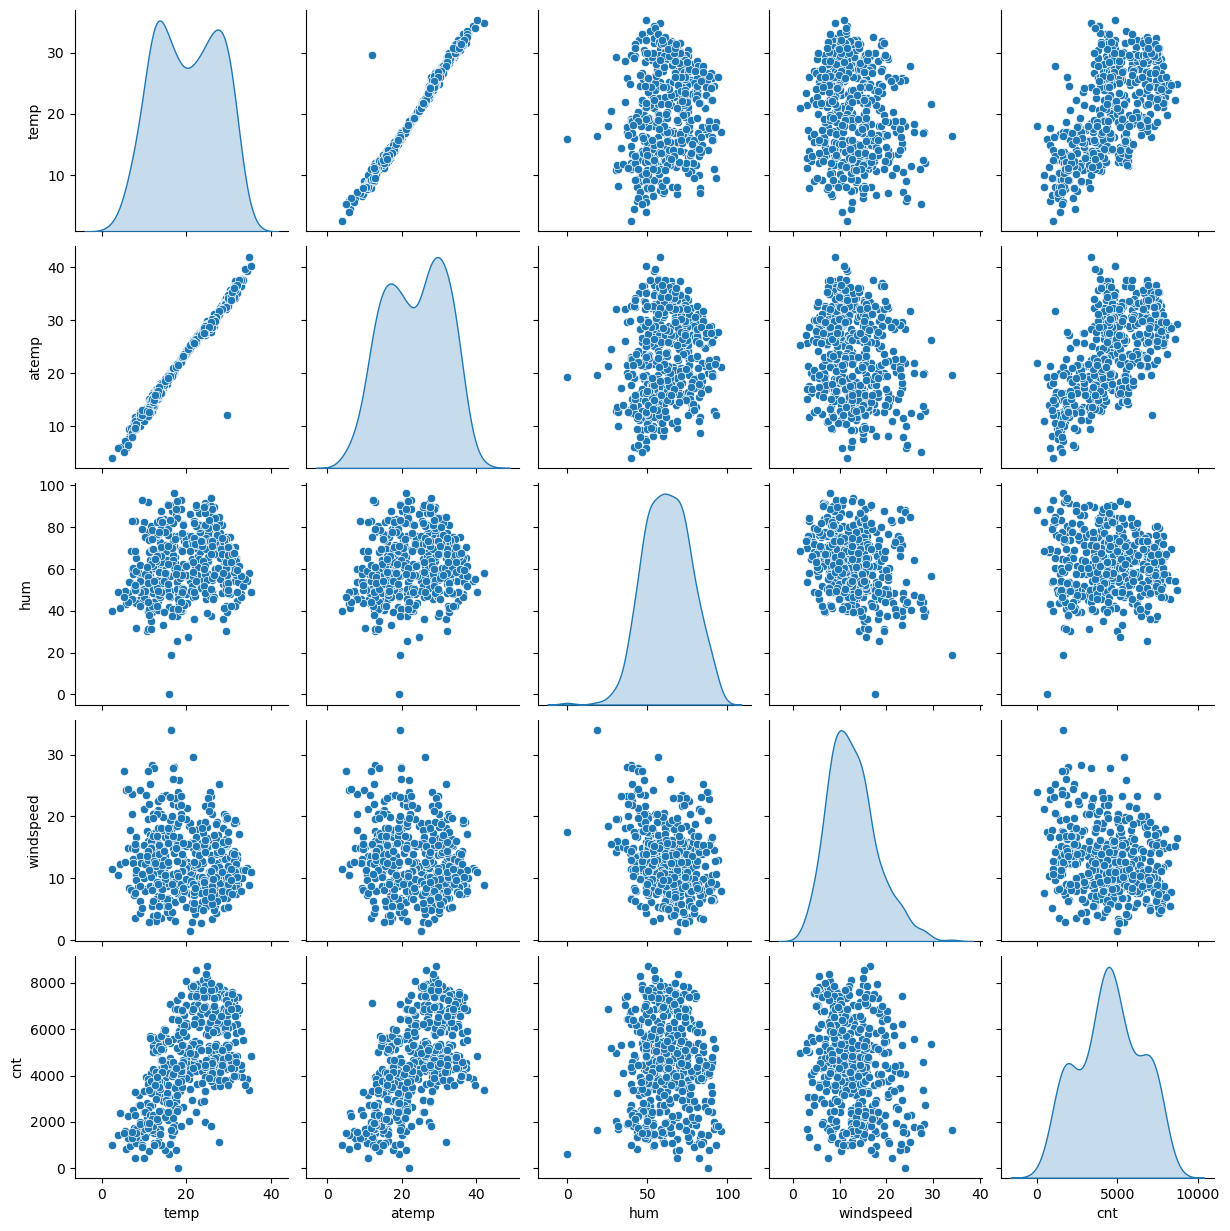

In [385]:
# Create a new dataframe of only numeric variables:

df_num = df_train[['temp', 'atemp', 'hum', 'windspeed', 'cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

In [387]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    bool   
 9   season_3      510 non-null    bool   
 10  season_4      510 non-null    bool   
 11  mnth_2        510 non-null    bool   
 12  mnth_3        510 non-null    bool   
 13  mnth_4        510 non-null    bool   
 14  mnth_5        510 non-null    bool   
 15  mnth_6        510 non-null    bool   
 16  mnth_7        510 non-null    bool   
 17  mnth_8        510 non-null    bool   
 18  mnth_9        510 non-null    boo

 Building boxplot of all categorical variables (before creating dummies) againt the target variable 'cnt' 
to see how each of the predictor variable stackup against the target variable.

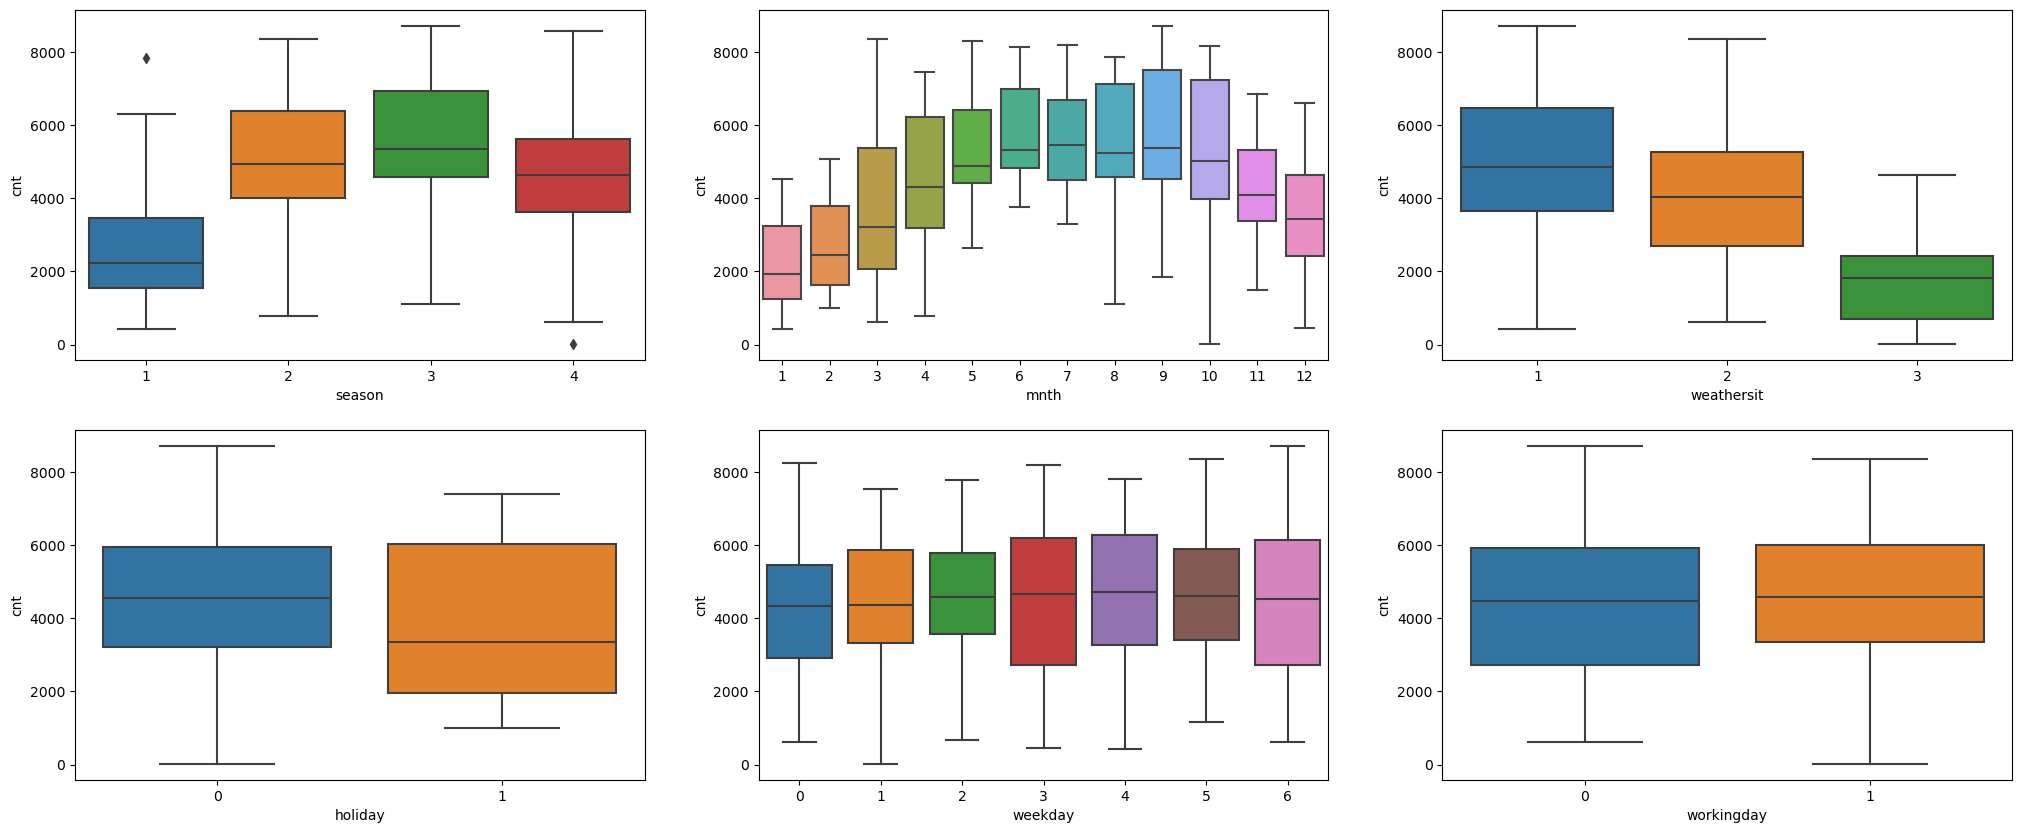

In [389]:
plt.figure(figsize=(25,10))

plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=df)

plt.subplot(2,3,2)
sns.boxplot(x='mnth', y='cnt', data=df)

plt.subplot(2,3,3)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(2,3,4)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(2,3,5)
sns.boxplot(x='weekday', y='cnt', data=df)

plt.subplot(2,3,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.show()

Season: Around 33% of bike bookings happen in season 3, with a median of over 5,000 bookings in the two-year period. Season 2 and Season 4 follow with 27% and 25% of bookings. This suggests that season can be a strong predictor of bike bookings.

Month: About 10% of bike bookings occur in the months of May through September, with a median of over 4,000 bookings per month. This shows a trend in bookings during these months, making the month a potentially good predictor.

Weather: Around 67% of bike bookings happen during clear weather (weathersit1) with a median close to 5,000. Another 30% occur during cloudy weather (weathersit2). This suggests that weather has a noticeable impact on bookings and could be a strong predictor.

Holiday: Almost 97.6% of bookings occur on non-holidays, indicating a strong bias in the data. As a result, holidays do not seem to be a useful predictor for bike bookings.

Weekday: Bookings are fairly evenly spread across all days of the week, ranging between 13.5% and 14.8%, with medians between 4,000 and 5,000 bookings. It’s uncertain if the day of the week has much influence on bookings, so we’ll let the model decide its importance.

Working Day: About 69% of bookings happen on working days, with a median of around 5,000 bookings. This suggests that whether it's a working day or not could be an important predictor for bike bookings.

## Correlation Matrix

Let's check the correlation coefficients to see which variables are highly correlated. Note: here we are considering only those variables (dataframe: bike_new) that were chosen for analysis


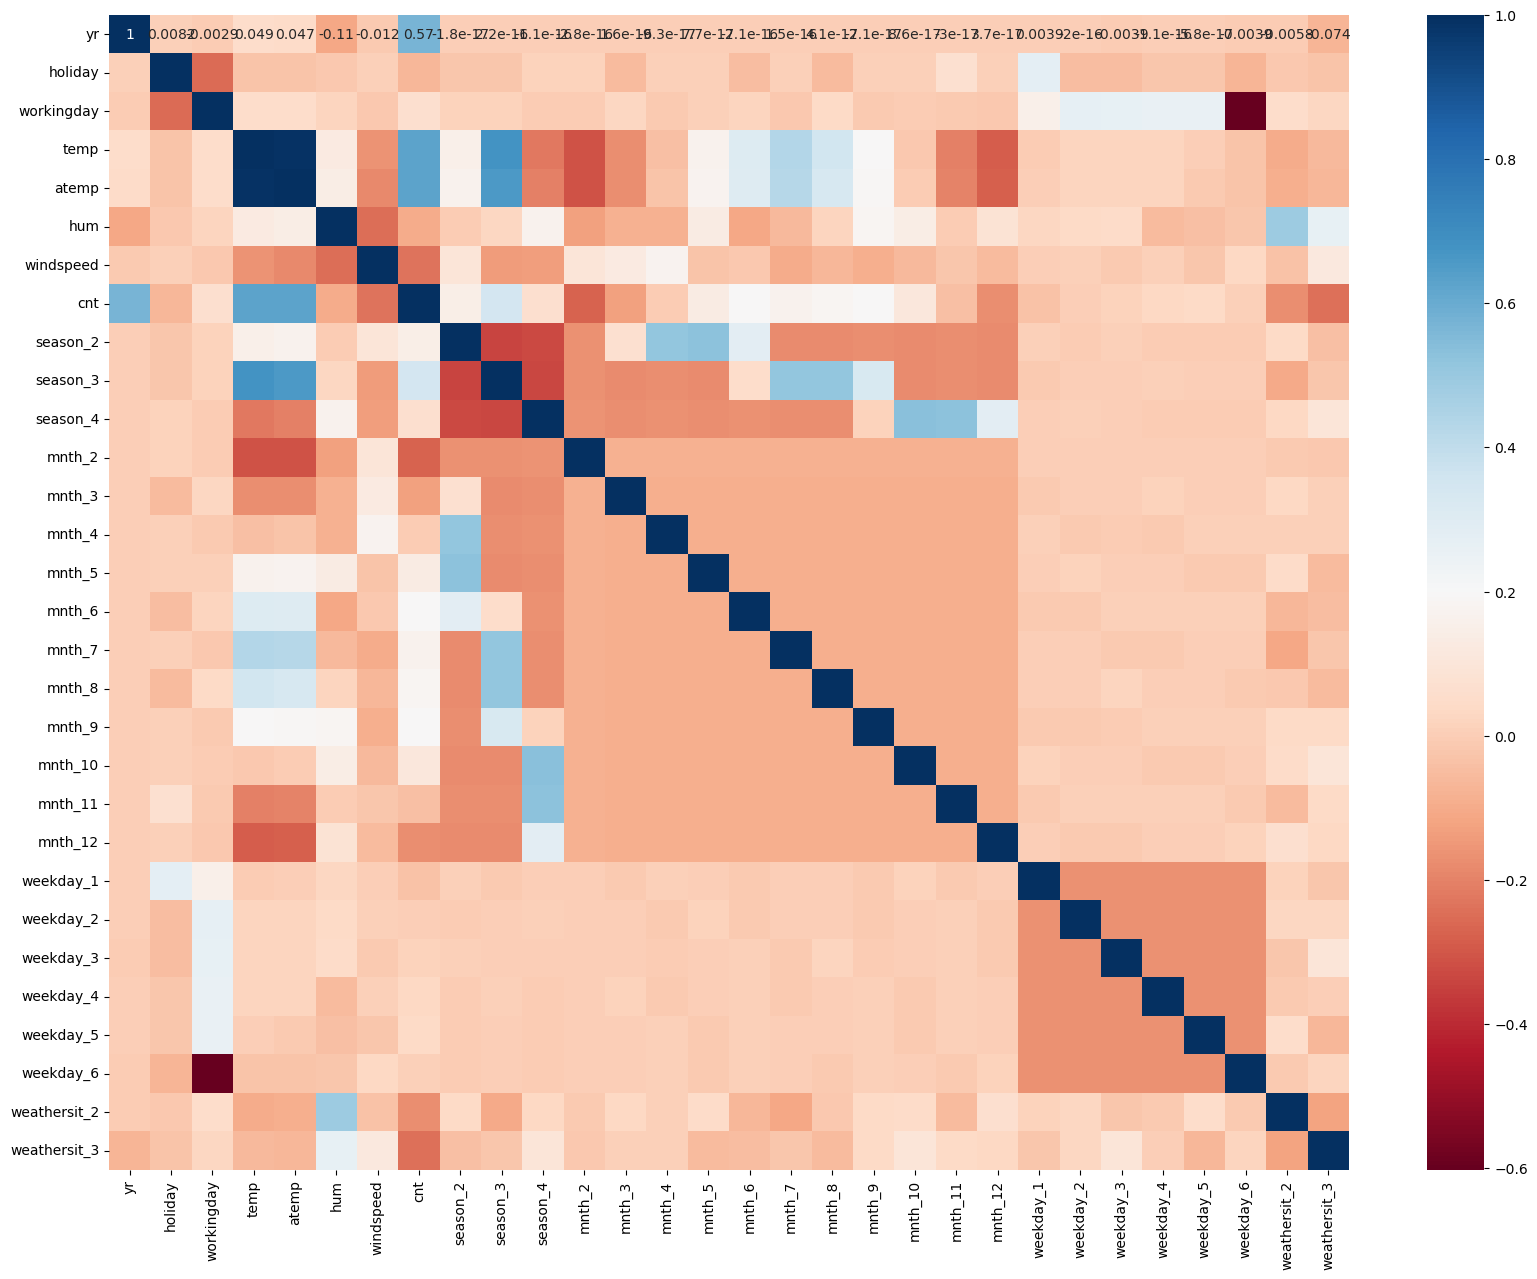

In [392]:
plt.figure(figsize = (20,15))
sns.heatmap(df_new.corr(), annot = True, cmap='RdBu')
plt.show()

The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.

We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

## RESCALING THE FEATURES

In [395]:
from sklearn.preprocessing import MinMaxScaler
scaler =  MinMaxScaler()

In [396]:
# checking the values before scaling
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,18.791653,22.50605,58.7083,7.832836,6304,True,False,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,16.126653,19.56980,49.4583,9.791514,7109,False,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,31.638347,35.16460,55.0833,10.500039,4266,False,True,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,14.862500,18.49690,83.8750,6.749714,3786,False,False,...,False,True,False,False,False,False,False,False,True,False
8,0,0,0,5.671653,5.80875,43.4167,24.250650,822,False,False,...,False,False,False,False,False,False,False,False,False,False


In [397]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_2', 'weathersit_3'],
      dtype='object')

In [398]:
# applying scaler to all vairables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,True,False,...,False,False,False,False,False,False,False,False,False,False
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,False,False,...,False,False,False,False,False,False,False,True,False,False
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,False,True,...,False,False,True,False,False,False,False,False,False,False
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,False,False,...,False,True,False,False,False,False,False,False,True,False
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,False,False,...,False,False,False,False,False,False,False,False,False,False


In [399]:
# Identify boolean columns
bool_cols = df_train.select_dtypes(include='bool').columns

# Convert boolean columns to 1 and 0
df_train[bool_cols] = df_train[bool_cols].astype(int)

# Check the result
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
483,1,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,...,0,0,0,0,0,0,0,0,0,0
650,1,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,0,0,...,0,0,0,0,0,0,0,1,0,0
212,0,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,1,...,0,0,1,0,0,0,0,0,0,0
714,1,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,0,0,...,0,1,0,0,0,0,0,0,1,0
8,0,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,...,0,0,0,0,0,0,0,0,0,0


In [400]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.501961,0.023529,0.682353,0.540901,0.515631,0.647390,0.346318,0.515144,0.247059,0.262745,...,0.086275,0.076471,0.139216,0.141176,0.150980,0.129412,0.145098,0.150980,0.341176,0.025490
std,0.500487,0.151726,0.466018,0.227898,0.213626,0.149722,0.160266,0.224281,0.431725,0.440557,...,0.281045,0.266010,0.346511,0.348545,0.358381,0.335985,0.352545,0.358381,0.474570,0.157763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.343228,0.335807,0.536147,0.230784,0.359468,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.525578,0.646367,0.325635,0.516337,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.740406,0.692378,0.757900,0.434287,0.685861,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# BUILDING A LINEAR MODEL
## Dividing into X and Y sets for the model building

In [402]:
y_train = df_train.pop('cnt')
X_train = df_train

Recursive feature elimination: We will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [404]:
# importing RFE and LinearReg
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

lm = LinearRegression()
lm.fit(X_train, y_train)

# Correctly initialize RFE with named parameters
rfe = RFE(estimator=lm, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# Display the results
selected_features = list(zip(X_train.columns, rfe.support_, rfe.ranking_))
selected_features

[('yr', True, 1),
 ('holiday', False, 18),
 ('workingday', False, 6),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('mnth_2', False, 12),
 ('mnth_3', False, 3),
 ('mnth_4', False, 8),
 ('mnth_5', False, 7),
 ('mnth_6', False, 9),
 ('mnth_7', False, 20),
 ('mnth_8', False, 10),
 ('mnth_9', True, 1),
 ('mnth_10', False, 2),
 ('mnth_11', False, 13),
 ('mnth_12', False, 19),
 ('weekday_1', False, 11),
 ('weekday_2', False, 17),
 ('weekday_3', False, 15),
 ('weekday_4', False, 16),
 ('weekday_5', False, 14),
 ('weekday_6', False, 5),
 ('weathersit_2', False, 4),
 ('weathersit_3', True, 1)]

In [405]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_2', 'season_3',
       'season_4', 'mnth_9', 'weathersit_3'],
      dtype='object')

In [406]:
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [407]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Building Linear Model using 'STATS MODEL'
### Model 1
### VIF Check

In [409]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,382.82
2,atemp,360.95
3,hum,10.87
6,season_3,6.69
4,windspeed,4.30
5,season_2,3.39
7,season_4,2.46
0,yr,2.00
8,mnth_9,1.25
9,weathersit_3,1.08


In [410]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [411]:
# Check the parameters obtained

lr1.params

const           0.279563
yr              0.226009
temp            0.442863
atemp           0.091364
hum            -0.275280
windspeed      -0.204756
season_2        0.115295
season_3        0.058767
season_4        0.159028
mnth_9          0.094989
weathersit_3   -0.215764
dtype: float64

In [414]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.76e-182
Time:                        17:47:49   Log-Likelihood:                 484.31
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     499   BIC:                            -900.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2796      0.027     10.304   

## Model 2
### Removing the variable 'atemp' based on its High p-value & High VIF

In [416]:
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

### VIF Check

In [419]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,20.81
2,hum,10.66
5,season_3,6.59
3,windspeed,4.17
4,season_2,3.39
6,season_4,2.46
0,yr,2.00
7,mnth_9,1.25
8,weathersit_3,1.08


In [420]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [421]:
# Check the parameters obtained

lr2.params

const           0.281194
yr              0.225972
temp            0.529315
hum            -0.274869
windspeed      -0.208373
season_2        0.115438
season_3        0.057240
season_4        0.159421
mnth_9          0.095000
weathersit_3   -0.216098
dtype: float64

In [423]:
# Print a summary of the linear regression model obtained
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.4
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.23e-183
Time:                        17:47:50   Log-Likelihood:                 484.11
No. Observations:                 510   AIC:                            -948.2
Df Residuals:                     500   BIC:                            -905.9
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2812      0.027     10.417   

## Model 3

Removing the variable 'hum' based on its Very High 'VIF' value.

Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general 
knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [436]:
X_train_new = X_train_new.drop(["hum"], axis = 1)


### VIF Check

In [443]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,14.08
4,season_3,6.24
2,windspeed,3.56
3,season_2,3.37
5,season_4,2.37
0,yr,2.00
6,mnth_9,1.23
7,weathersit_3,1.05


In [445]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [449]:
lr3.params

const           0.102976
yr              0.234266
temp            0.484787
windspeed      -0.142661
season_2        0.112819
season_3        0.071613
season_4        0.149213
mnth_9          0.075434
weathersit_3   -0.279636
dtype: float64

In [450]:
# Print a summary of the linear regression model obtained
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     248.6
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.92e-169
Time:                        17:47:54   Log-Likelihood:                 448.11
No. Observations:                 510   AIC:                            -878.2
Df Residuals:                     501   BIC:                            -840.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1030      0.019      5.458   

## Model 4

Removing the variable 'season3' based on its Very High 'VIF' value.

Even though the VIF of season3 is second highest, we decided to drop 'season3' and not 'temp' based on general 
knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'

In [452]:
X_train_new = X_train_new.drop(["season_3"], axis = 1)

### VIF CHeck

In [455]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.80
2,windspeed,3.34
0,yr,1.98
3,season_2,1.53
4,season_4,1.32
5,mnth_9,1.19
6,weathersit_3,1.05


In [456]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

# Check the parameters obtained

lr4.params

const           0.088996
yr              0.232942
temp            0.576578
windspeed      -0.145634
season_2        0.073679
season_4        0.122215
mnth_9          0.086493
weathersit_3   -0.275324
dtype: float64

In [458]:
# Print a summary of the linear regression model obtained
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     277.7
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          4.21e-168
Time:                        17:47:56   Log-Likelihood:                 443.01
No. Observations:                 510   AIC:                            -870.0
Df Residuals:                     502   BIC:                            -836.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0890      0.019      4.807   

### Model 5
Removing the variable 'mnth_10' based on its Very High p-value.

In [463]:
X_train_new = X_train_new.drop(["mnth_9"], axis = 1)

### VIF Check

In [466]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.46
2,windspeed,3.32
0,yr,1.98
3,season_2,1.48
4,season_4,1.32
5,weathersit_3,1.05


In [469]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_new)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

# Check the parameters obtained

lr5.params

const           0.089290
yr              0.232896
temp            0.598964
windspeed      -0.153955
season_2        0.062963
season_4        0.122506
weathersit_3   -0.267373
dtype: float64

In [471]:
# Print a summary of the linear regression model obtained
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     305.0
Date:                Wed, 25 Sep 2024   Prob (F-statistic):          5.01e-164
Time:                        17:47:57   Log-Likelihood:                 430.49
No. Observations:                 510   AIC:                            -847.0
Df Residuals:                     503   BIC:                            -817.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0893      0.019      4.711   

### Final Model Interpretation:

#### Hypothesis Testing:
- Null Hypothesis \(H_0: \beta_1 = \beta_2 = ... = \beta_n = 0\)
- Alternative Hypothesis \(H_1: \) At least one \( \beta_i \neq 0\)

Since most coefficients in this model are not zero and the p-values are very low (below 0.05 for all variables), we **Reject the Null Hypothesis**, suggesting that at least one of the predictor variables significantly impacts the dependent variable `cnt` (bike rentals).

---

### F-Statistics:
- **F-statistic**: 305.0
- **Prob (F-statistic)**: 5.01e-164

Since the F-statistic is much larger than 1, and the p-value is effectively 0, this indicates that the overall model is highly significant, meaning that the predictor variables jointly explain a significant portion of the variability in bike rentals.

---

### Equation of the Best-Fitted Surface:
The general form of the regression equation based on the results can be written as:

\[
cnt = 0.0893 + (yr \times 0.2329) + (temp \times 0.5990) - (windspeed \times 0.1540) + (season\_2 \times 0.0630) + (season\_4 \times 0.1225) - (weathersit\_3 \times 0.2674)
\]

---

### Interpretation of Coefficients:

- **yr**: A coefficient value of `0.2329` indicates that with each additional year, the bike rentals increase by approximately 0.2329 units (interpreted relative to the base year).
  
- **temp**: A coefficient of `0.5990` suggests that for every unit increase in temperature, the bike rentals increase by approximately 0.5990 units, making temperature a strong positive predictor.

- **windspeed**: The coefficient of `-0.1540` indicates that higher wind speeds decrease bike rentals. For every unit increase in windspeed, the bike rentals decrease by about 0.1540 units.

- **season_2 (spring)**: This positive coefficient (`0.0630`) suggests that compared to the base season (likely winter), spring increases bike rentals by 0.0630 units.

- **season_4 (fall)**: The coefficient of `0.1225` shows that compared to the base season, fall increases bike rentals by 0.1225 units.

- **weathersit_3 (bad weather)**: The negative coefficient (`-0.2674`) indicates that compared to the best weather (weathersit_1), having weather classified as weathersit_3 decreases bike rentals by 0.2674 units.

---

### Conclusion:
The model shows a strong predictive power for bike rentals based on the independent variables, with significant contributions from year, temperature, windspeed, season, and weather conditions. The F-statistic and low p-values reinforce the strength and reliability of this model.


This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).

Assumptions
Error terms are normally distributed with mean zero (not X, Y)

Text(0.5, 0, 'Errors')

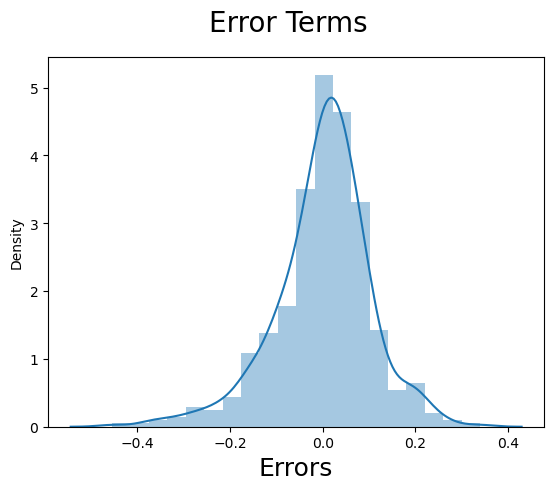

In [480]:
# Residual Analysis Of Training Data
y_train_pred = lr5.predict(X_train_lm5)

res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18)

from the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### There is a linear relationship between X and Y

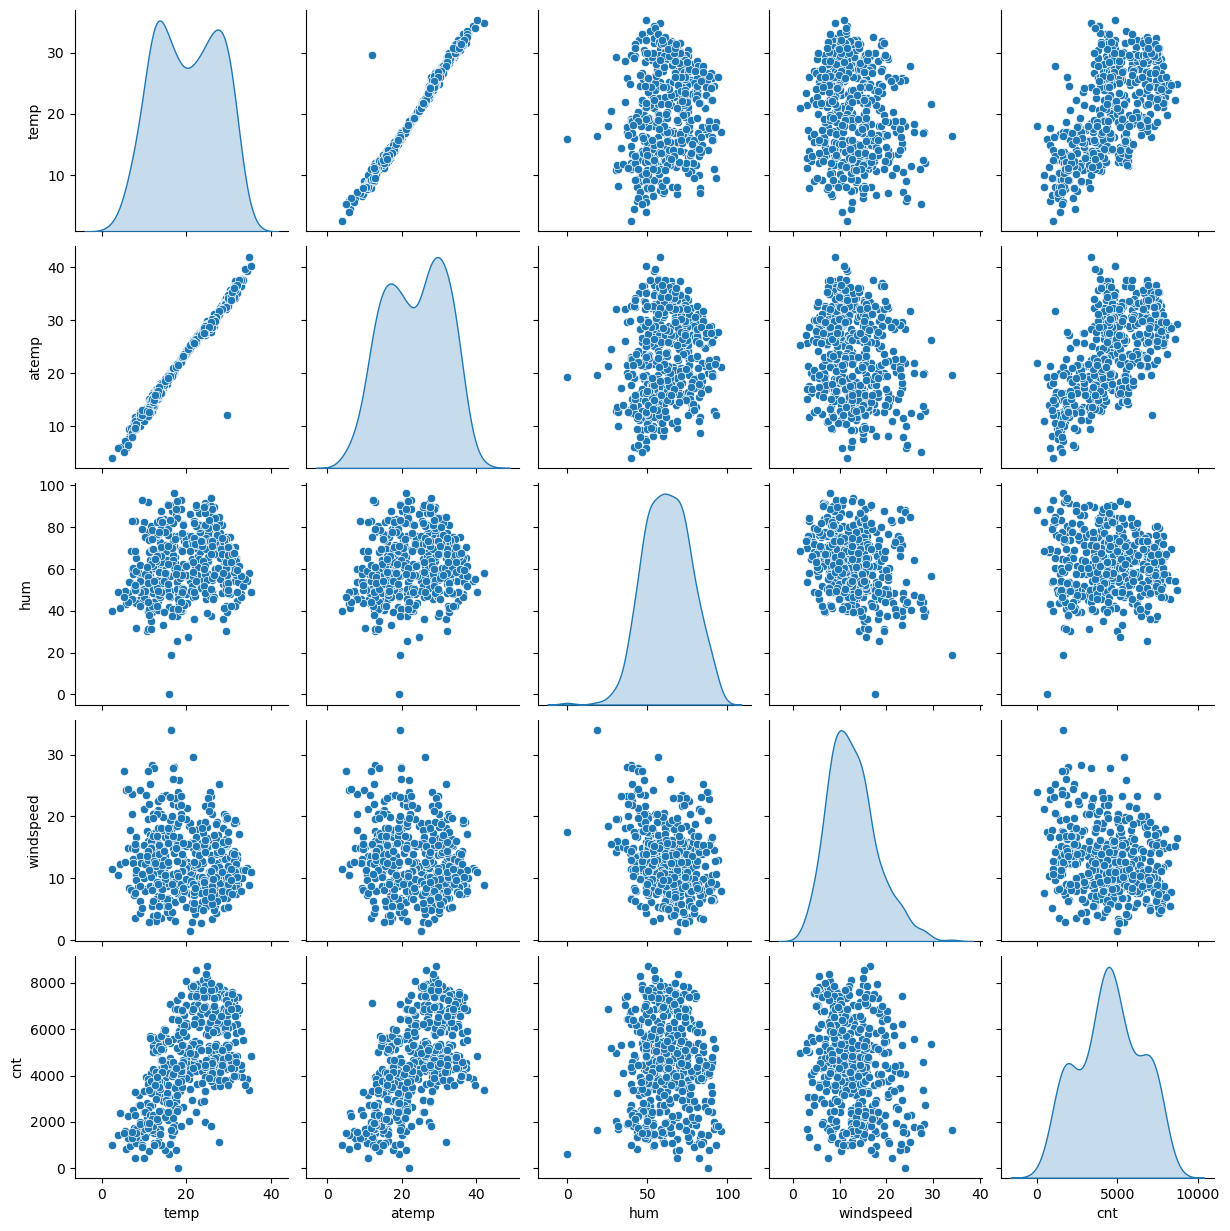

In [484]:
df_new=df_new[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(df_num, diag_kind='kde')
plt.show()

There is No Multicollinearity between the predictor variables

In [486]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,3.46
2,windspeed,3.32
0,yr,1.98
3,season_2,1.48
4,season_4,1.32
5,weathersit_3,1.05


From the VIF calculation we could find that there is no multicollinearity existing between the predictor variables, as all the values are within permissible range of below 5

### MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr6)

Applying the scaling on the test sets

In [489]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
22,0,0,0,0.046591,0.025950,0.453529,0.462217,0.110907,False,False,...,False,False,False,False,False,False,False,False,False,False
468,1,0,0,0.543115,0.536771,0.522511,0.347424,0.855729,True,False,...,False,False,False,False,False,False,False,True,False,False
553,1,0,0,0.951196,0.933712,0.596104,0.212829,0.534975,False,True,...,False,False,False,False,False,False,False,False,False,False
504,1,0,0,0.699909,0.662746,0.551083,0.478229,0.817648,True,False,...,False,False,False,False,False,False,False,False,False,False
353,0,0,1,0.407087,0.416610,0.618615,0.080770,0.428900,False,False,...,False,True,False,True,False,False,False,False,True,False


In [490]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.493151,0.041096,0.684932,0.551225,0.527528,0.662567,0.346706,0.518889
std,0.501098,0.198967,0.465607,0.229463,0.215434,0.143562,0.159553,0.219953
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.301299,0.073090,0.055683
25%,0.000000,0.000000,0.000000,0.356479,0.348019,0.553031,0.232689,0.364703
50%,0.000000,0.000000,1.000000,0.557653,0.549198,0.662338,0.328208,0.525771
75%,1.000000,0.000000,1.000000,0.751309,0.709163,0.762338,0.435708,0.676887
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.010390,0.824380,0.963300


#### Dividing into X_test and y_test

In [492]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    bool   
 8   season_3      219 non-null    bool   
 9   season_4      219 non-null    bool   
 10  mnth_2        219 non-null    bool   
 11  mnth_3        219 non-null    bool   
 12  mnth_4        219 non-null    bool   
 13  mnth_5        219 non-null    bool   
 14  mnth_6        219 non-null    bool   
 15  mnth_7        219 non-null    bool   
 16  mnth_8        219 non-null    bool   
 17  mnth_9        219 non-null    bool   
 18  mnth_10       219 non-null    bool

In [493]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm5 = sm.add_constant(X_test)
X_test_lm5.info()


<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 22 to 313
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    bool   
 5   season_4      219 non-null    bool   
 6   weathersit_3  219 non-null    bool   
dtypes: bool(3), float64(3), int64(1)
memory usage: 9.2 KB


In [500]:
# Making predictions using the final model (lr5)

y_pred = lr5.predict(X_test_lm5)

## MODEL EVALUATION

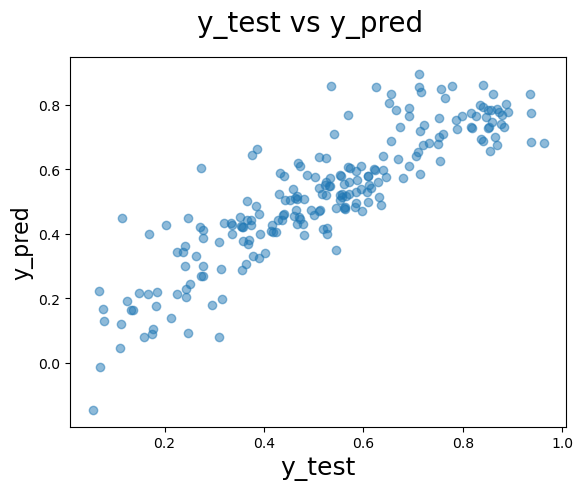

In [503]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                          
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### R^2 value for TEST

In [506]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7737980330122076

In [508]:
# We already have the value of R^2 (calculated in above step)

r2=0.8037980330122076

In [510]:
# Get the shape of X_test
X_test.shape

(219, 6)

In [512]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7982451471540626

## FINAL REPORT
As per our final Model, the top 3 predictor variables that influences the bike booking are:
Temperature (temp) - A coefficient value of ‘0.5990’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units.
Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2674’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
Year (yr) - A coefficient value of ‘0.2329’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
The next best features that can also be considered are
season_4: - A coefficient value of ‘0.1225’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.
windspeed: - A coefficient value of ‘-0.1540’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.
### NOTE:
The details of weathersit_1 & weathersit_3
weathersit_2: Clear, Few clouds, Partly cloudy, Partly cloudy
weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
The details of season2& season4
season2: spring
season4: winter